In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

np.random.seed(123)

### examine the distribution of the differences between two random normal variables groups

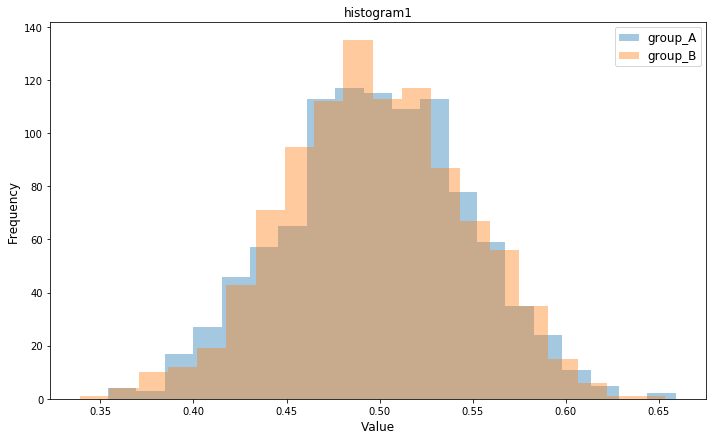

In [9]:
sims = 1000
group_mean_A = []
group_mean_B = []
dif_Mean= []

for sim in range(sims):
    # group_A
    N = 1000
    sample_mean_A = 0.5
    sample_stdev__A = 0.05
    group_A = []
    [group_A.append(np.random.randn()*sample_stdev__A + sample_mean_A) for i in range(N)];

    # group_B
    N = 1000
    sample_mean_B = 0.5
    sample_stdev__B = 0.05
    group_B = []
    [group_B.append(np.random.randn()*sample_stdev__B + sample_mean_B) for i in range(N)];
    
    group_mean_A.append(np.mean(group_A))
    group_mean_B.append(np.mean(group_B))
    dif_Mean.append(np.mean(group_B) - np.mean(group_A))

# Plot histogram for 1 sample

fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(group_A, kde=False, bins=20, label='group_A');
sns.distplot(group_B, kde=False, bins=20, label='group_B');

ax.set_xlabel("Value",fontsize=12)
ax.set_ylabel("Frequency",fontsize=12)
plt.legend()
plt.setp(ax.get_legend().get_texts(), fontsize=12)
plt.tight_layout()
plt.title('histogram1')
#plt.savefig(fname='hist_A', dpi=300)
plt.show()

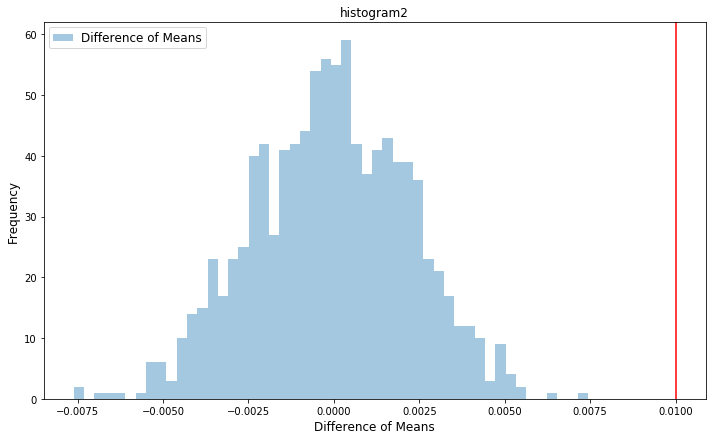

In [10]:
# Plot histogram  for all simulation

fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(dif_Mean, kde=False, bins=50, label='Difference of Means');

ax.set_xlabel("Difference of Means",fontsize=12)
ax.set_ylabel("Frequency",fontsize=12)
plt.axvline(x=0.01, c='red')
plt.legend()
plt.setp(ax.get_legend().get_texts(), fontsize=12)
plt.tight_layout()
plt.title('histogram2')
#plt.savefig(fname='hist_B', dpi=300)
plt.show()

Text(0.5, 1.0, 'qq_plot')

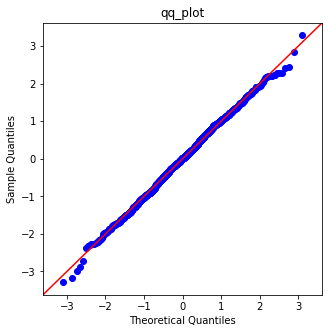

In [11]:
# check for normal distribution

fig_qq, ax_qq = plt.subplots(figsize=(5,5))
sm.qqplot(np.array(dif_Mean), fit=True, line='45', ax=ax_qq);
plt.title('qq_plot')
#plt.savefig(fname='qq_plot', dpi=300)

In [12]:
print('Number of obs. >= group_B result: ' + str(sum([1 for i in dif_Mean if i >= 0.01])))
print('Percentage of obs. >= group_B result: ' + str(sum([1 for i in dif_Mean if i >= 0.01])/sims))

print('sample_stdev_ group_B: ' + str(round(np.var(dif_Mean)**0.5, 5)))

print('sample_stdev_ of means analytical: ' + str(round((np.var(group_A)/len(group_A) + np.var(group_B)/len(group_B))**0.5, 5)))

print('Standard Error: ' + str((2*0.0020/1000)**0.5))

print('Test Statistic: ' + str((0.01 - 0)/(2*0.0020/1000)**0.5))

from scipy.stats import norm

# Two Tailed Test
print('The p-value is: ' + str(round((1 - norm.cdf(3.12))*2,4)))

Number of obs. >= group_B result: 0
Percentage of obs. >= group_B result: 0.0
sample_stdev_ group_B: 0.00229
sample_stdev_ of means analytical: 0.0022
Standard Error: 0.002
Test Statistic: 5.0
The p-value is: 0.0018
